In [1]:
#All based on the tutorial: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**:
    
\begin{equation}
y=b+mx
\end{equation}

where b is the intercept and m the slope of the curve.


**ML notation**

\begin{equation}
J(\theta)=\theta_0+\theta_1\cdot X
\end{equation}

where for the data example
    
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

where $b=\theta_0$ and $m=\theta_1$


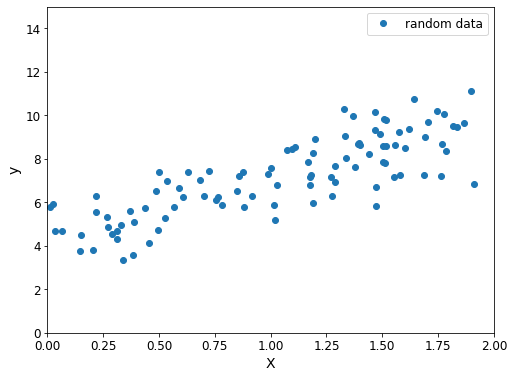

In [3]:
#Create data
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
#Visualize
# %matplotlib notebook

plt.figure(figsize=(8,6))
plt.plot(X,y,'o',label='random data')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.legend(fontsize=12)
_ =plt.axis([0,2,0,15])
plt.show()

### Analytical solving

In [4]:
X_b = np.c_[np.ones((100,1)),X] #bias unit to go from vector to matrix

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[4.38401137]
 [2.70777399]]


In [5]:
theta0=theta_best[0][0]
theta1=theta_best[1][0]

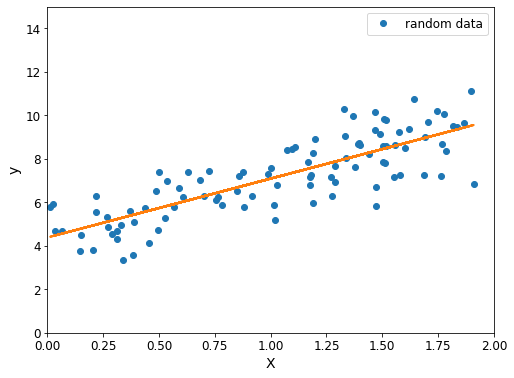

In [6]:
plt.figure(figsize=(8,6))
plt.plot(X,y,'o',label='random data')
plt.plot(X,theta0+X*theta1,linewidth=2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.legend(fontsize=12)
_ =plt.axis([0,2,0,15])
plt.show()

## Cost Function & Gradients

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

The cost function implementation vectorized:


\begin{equation}
J(\theta) = \frac{1}{2m} (X\theta-y)^T(X\theta-y) 
\end{equation}

Derivation vectorized to **all** theta:
\begin{equation}
        \frac{\partial}{\partial\theta}J(\theta)=\frac{1}{m}X^T(X\theta-y)
\end{equation}


In [7]:
def cost_func(theta,X,y):
    '''
    Calculates the cost function for a given X and y.
    
    theta = Vectors of theta
    X = Row of X's np.zeros((2,j))
    y = Actual y's np.zeros((2,1))
    
    j = number of features
    '''
    m=len(y)
    predictions=X.dot(theta)
    cost=(1/2*m) * np.sum(np.square(predictions-y))
    
    return cost


def cost_func2(theta,X,y):
    '''
    Calculates the cost function for a given X and y in a vectorized form
    '''
    m=len(y)
    cost = (1/(2*m))*np.transpose((X@theta -y))@(X@theta-y)

    return cost


def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for i in range(iterations):
        prediction = X.dot(theta)
        
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction-y)))
        theta_history[i,:] = theta.T
        cost_history[i] = cost_func(theta,X,y)
        
    return theta, cost_history, theta_history

def gradient_descent2(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for i in range(iterations):
        prediction = X.dot(theta)
        
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction-y)))
        theta_history[i,:] = theta.T
        cost_history[i] = cost_func2(theta,X,y)
        
    return theta, cost_history, theta_history

Run GD on the example data

In [8]:
l_rate =0.01
n_iterations = 1000

#We have two variable: theta zero and theta one.
#Initialize it randomly
theta = np.random.randn(2,1)

#We need X expressed as a matrix so we add a column of ones
#np.c_ Translates slice objects to concatenation along the second axis.
X_b = np.c_[np.ones((len(X),1)),X]

theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,l_rate,n_iterations)
theta2,cost_history2,theta_history2 = gradient_descent2(X_b,y,theta,l_rate,n_iterations)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta1[0][0],theta1[1][0]))
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta2[0][0],theta2[1][0]))

print('1-Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))
print('2-Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          3.718,
Theta1:          3.264
Theta0:          3.718,
Theta1:          3.264
1-Final cost/MSE:  5989.901
2-Final cost/MSE:  0.599


How the cost varies with the number of iteration? I.e., how many iterations do we really need?

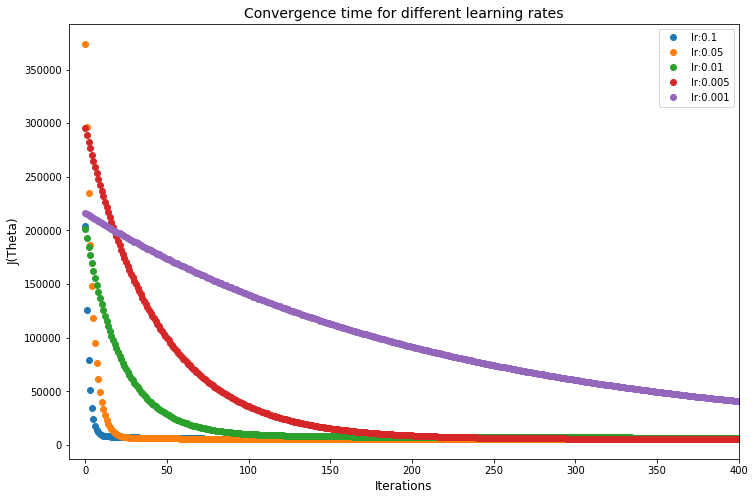

In [27]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)',fontsize=12)
ax.set_xlabel('Iterations',fontsize=12)

rates=[0.1,0.05,0.01,0.005,0.001]

for l_rate in rates:
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(X),1)),X]
    theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,l_rate,n_iterations)

    _=ax.plot(range(n_iterations),cost_history1,'o',label="lr:{}".format(l_rate))
    plt.legend()
# _=ax.plot(range(n_iterations),cost_history2)
plt.title("Convergence time for different learning rates",fontsize=14)
ax.set_xlim([-10,400])
plt.show()

# Stochastic Gradient Descent (SGD)

In pure **GD** we perfomr gradients on **each observation** one by one. Conversely, in **SGD** we perform over random observations, i.e., **samples are selected randomly**.

In [32]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_func(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [33]:
lr =0.5
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.467,
Theta1:          2.799
Final cost/MSE:  41.772


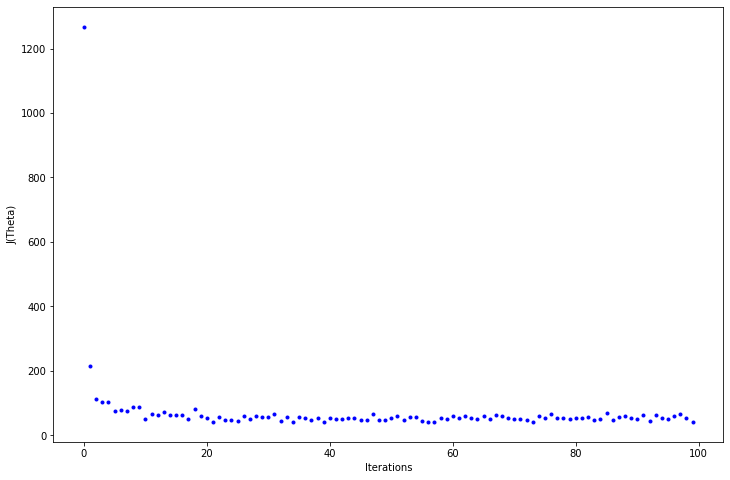

In [34]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent


In actual practice we use an approach called Mini batch gradient descent. This approach uses random samples but in batches. What this means is that we do not calculate the gradients for each observation but for a group of observations which results in a faster optimization. **A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches**.

In [36]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_func(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [37]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.315,
Theta1:          2.768
Final cost/MSE:  1095.834


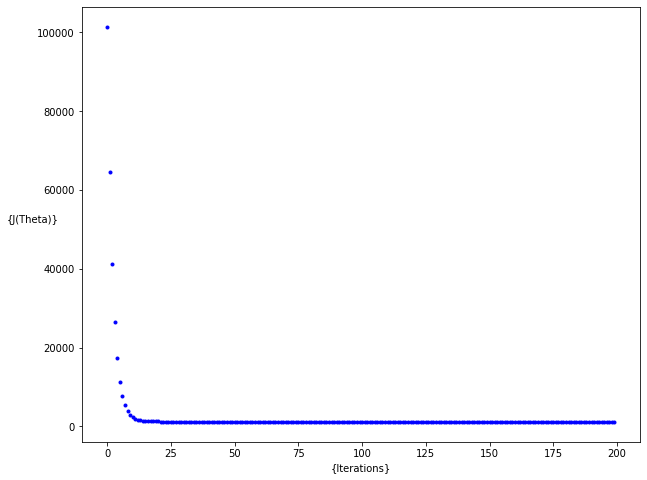

In [38]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [ ]:

### Plot the graphs for different iterations and learning rates combination

# def plot_GD(n_iter,lr,ax,ax1=None):
#      """
#      n_iter = no of iterations
#      lr = Learning Rate
#      ax = Axis to plot the Gradient Descent
#      ax1 = Axis to plot cost_history vs Iterations plot

#      """
#      _ = ax.plot(X,y,'b.')
#      theta = np.random.randn(2,1)

#      tr =0.1
#      cost_history = np.zeros(n_iter)
#      for i in range(n_iter):
#         pred_prev = X_b.dot(theta)
#         theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
#         pred = X_b.dot(theta)

#         cost_history[i] = h[0]

#         if ((i % 25 == 0) ):
#             _ = ax.plot(X,pred,'r-',alpha=tr)
#             if tr < 0.8:
#                 tr = tr+0.2
#      if not ax1== None:
#         _ = ax1.plot(range(n_iter),cost_history,'b.')  

# fig = plt.figure(figsize=(30,25),dpi=200)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
# count =0
# for n_iter, lr in it_lr:
#     count += 1
    
#     ax = fig.add_subplot(4, 2, count)
#     count += 1
   
#     ax1 = fig.add_subplot(4,2,count)
    
#     ax.set_title("lr:{}".format(lr))
#     ax1.set_title("Iterations:{}".format(n_iter))
#     plot_GD(n_iter,lr,ax,ax1)
    